In [ ]:
%cd /content/drive/MyDrive/Business Analyst. C/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst. C/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


In [ ]:
#data analysis
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

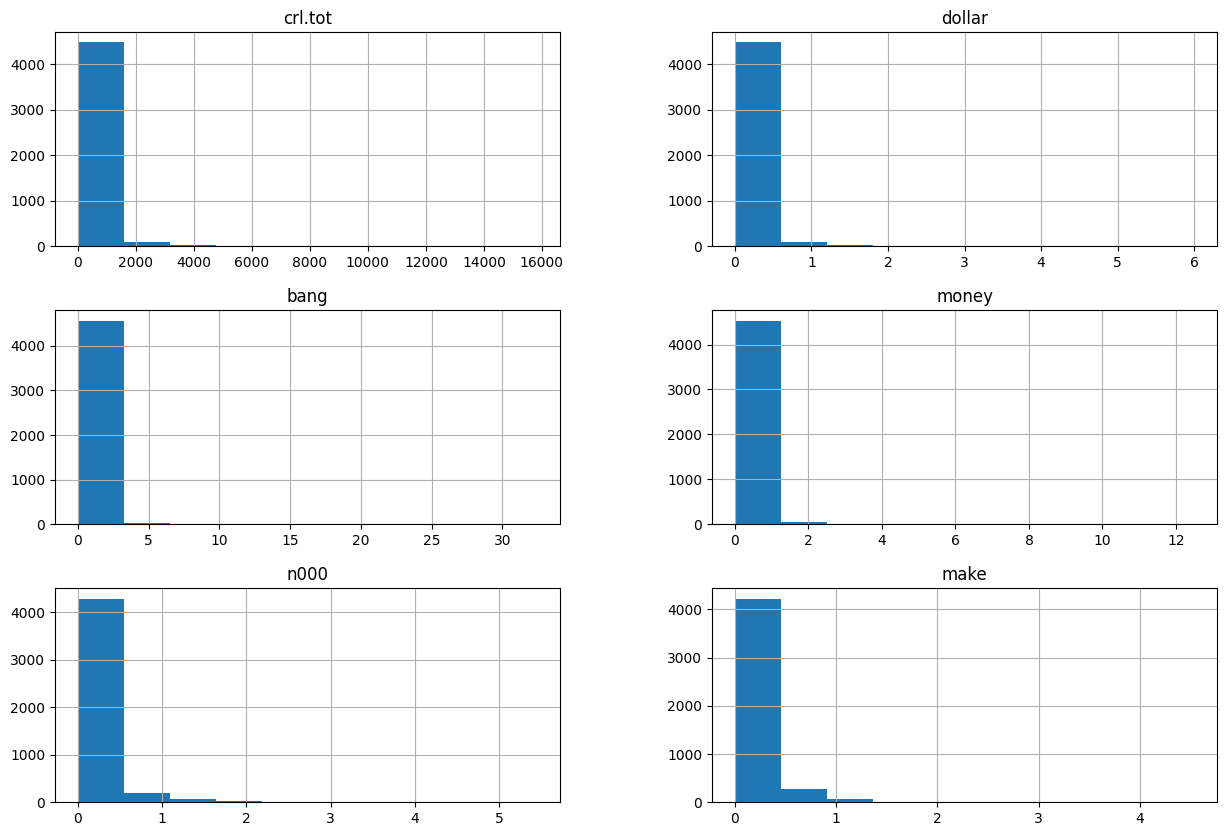

In [ ]:
df.hist(figsize = (15,10))

In [ ]:
# rmoving outliers
print(len(df))
df = df[df["crl.tot"] < 1500]
df = df[df["bang"] < 5]
df = df[df["money"] < 6 ]
print(len(df))

4601
4432


<ipython-input-7-67d0615e8da8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df.corr(),


<Axes: >

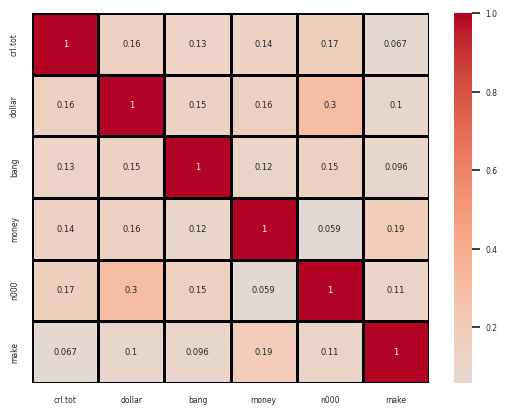

In [ ]:
# correlation matrix
sns.set(font_scale = 0.5)
sns.heatmap( df.corr(),
            cmap = "coolwarm",
            fmt =".2g",
            linecolor = "black",
            annot = True,
            center = 0,
            linewidths= 1)

In [ ]:
# Logestic regression Preperration
df["yesno"] = np.where(df["yesno"] == "y",1,0)
df.head(1)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.0,0.778,0.0,0.0,0.0,1


In [ ]:
# prepare the x & y
y = df["yesno"]
x = df.drop(columns = ["yesno"])
x = sm.add_constant(x)
print(x)
y


      const  crl.tot  dollar   bang  money  n000  make
0       1.0      278    0.00  0.778   0.00  0.00  0.00
1       1.0     1028    0.18  0.372   0.43  0.43  0.21
3       1.0      191    0.00  0.137   0.00  0.00  0.00
4       1.0      191    0.00  0.135   0.00  0.00  0.00
5       1.0       54    0.00  0.000   0.00  0.00  0.00
...     ...      ...     ...    ...    ...   ...   ...
4596    1.0       88    0.00  0.000   0.00  0.00  0.31
4597    1.0       14    0.00  0.353   0.00  0.00  0.00
4598    1.0      118    0.00  0.000   0.00  0.00  0.30
4599    1.0       78    0.00  0.000   0.00  0.00  0.96
4600    1.0       40    0.00  0.125   0.00  0.00  0.00

[4432 rows x 7 columns]


0       1
1       1
3       1
4       1
5       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: yesno, Length: 4432, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_text,y_train,y_test = train_test_split(x,y,
                                                 random_state = 1502,
                                                 test_size = 0.2)

Logistic Regression


In [ ]:
#logistic regression
model3 = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8


In [ ]:
print(model3.summary())

                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Sat, 19 Aug 2023   Pseudo R-squ.:                  0.4210
Time:                        14:05:45   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.000      8.985      0.000       0.001       0.002
dollar         6.5798      0.682      9.652      0.0

In [ ]:
# create a function
def logistic_reader(coefficient):
  probability = round((np.exp(coefficient)-1)*100,2)
  if probability > 0:
    print("The likelyhood increase by ",probability,"%")
  elif probability == 0:
    print("No impact")
  else:
    print("The likelihood decreases by",probability,"%")

In [ ]:
logistic_reader(6.5798)

The likelyhood increase by  71939.52 %


In [ ]:
# Assesing the model
predictions = model3.predict(X_text)
predictions = np.where(predictions > 0.5,1,0)
predictions[:5]

array([1, 0, 0, 0, 0])

In [ ]:
y_test
# check if data set is balenced
y_test.mean()   # we have 35% share of ones "1's" - it is in the limit of being a balenced data set - so any value below 0.3 would be an imbalenced data set.


0.35400225479143177

In [ ]:

# confusin matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()


524 49 102 212


In [ ]:
fn

102

In [ ]:
# Accuracy

accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Accuracy:", round(accuracy*100,1),"%")

# F-1 squrae
f1 = 2 * tp / (2*tp+fn+fp)
print("F-1 score :",round(f1*100,1),"%") # f-1 score is not really interpretable, it is constantly comapared with other models and has to be improved.

# specificity
specificity = tn / (tn+fp)
print("specificity:",round(specificity*100,1),"%")

# sensitivity
sensitivity = tp / (tp+fn)
print("sensitivity:",round(sensitivity*100,1),"%")

Accuracy: 83.0 %
F-1 score : 73.7 %
specificity: 91.4 %
sensitivity: 67.5 %


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))  # specificity and sensitivity can be found in the classification report under the recall section

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

